# Data Visualisation for Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../trainDataset.csv')
df

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.000000,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.000000,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.000000,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.000000,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.000000,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,TRG002955,1,49.250000,46.1,0,0,0,1,3,3,...,0.439568,0.439568,3.056046,0.001339,1.671271e+07,79.989003,0.003282,0.024716,0.000812,0.003078
396,TRG002958,0,48.500000,53.3,0,0,0,1,2,1,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
397,TRG002961,0,47.500000,68.8,1,0,0,0,3,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368
398,TRG002962,0,46.916667,46.0,1,0,0,0,2,1,...,0.670229,0.670229,1.857045,0.006706,5.609262e+05,9.609163,0.026591,0.018682,0.000311,0.022676


In [3]:
df = df[~(df == 999).any(axis=1)]
df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 399
Columns: 119 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(108), int64(11)
memory usage: 365.6 KB


/Users/tomkirby/opt/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
for i in range(12, len(df.columns)):
    df.columns.values[i] = 'img_' + str(i)

df = df.reset_index()

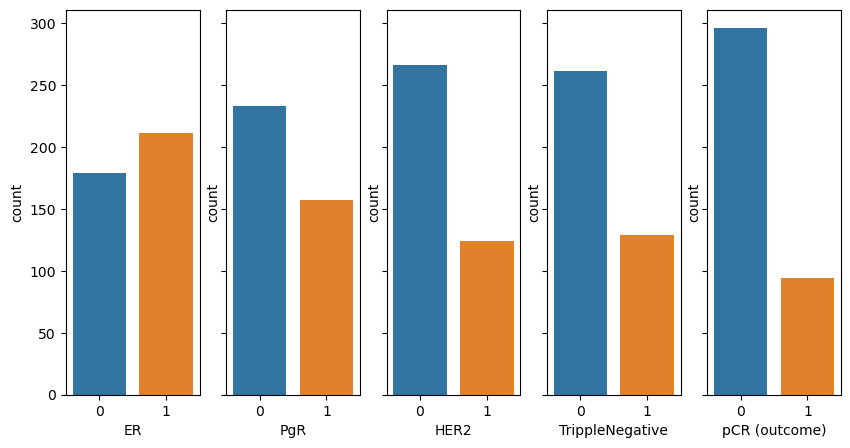

In [5]:
fig, axs = plt.subplots(1, 5, sharey=True)
fig.set_size_inches(10,5)
for i, col in enumerate(df.columns[4:8]):
    sns.countplot(x=col, data=df, ax=axs[i])

sns.countplot(x='pCR (outcome)', data=df, ax=axs[4])

4.249383689553744e-06
2.834931213601398e-05
7.541735281989606e-06
0.1068742151758905
0.10057333942781464
0.008469682498550455
0.20132668507658524
0.003882039119549789
0.04921094183837238


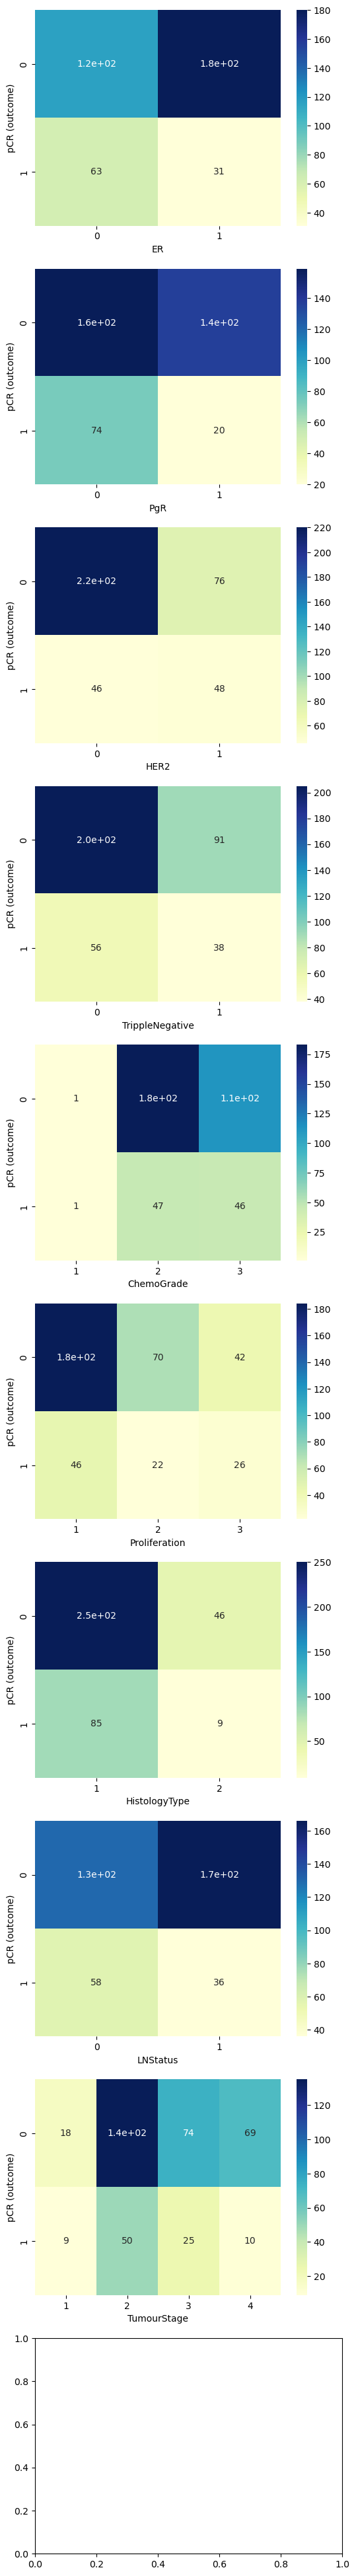

In [10]:
from scipy.stats import chi2_contingency

fig, axs = plt.subplots(10, 1)
fig.set_size_inches(6,50)
contingencys = []

for i in range(9):
    contingencys.append(pd.crosstab(df['pCR (outcome)'], df.iloc[:,i+4]))
    sns.heatmap(contingencys[i], annot=True, cmap="YlGnBu", ax=axs[i])
    _, p, _, _ = chi2_contingency(contingencys[i])
    print(p)

In [11]:
print(p_er, p_pgr, p_her2)

4.249383689553744e-06 2.834931213601398e-05 7.541735281989606e-06


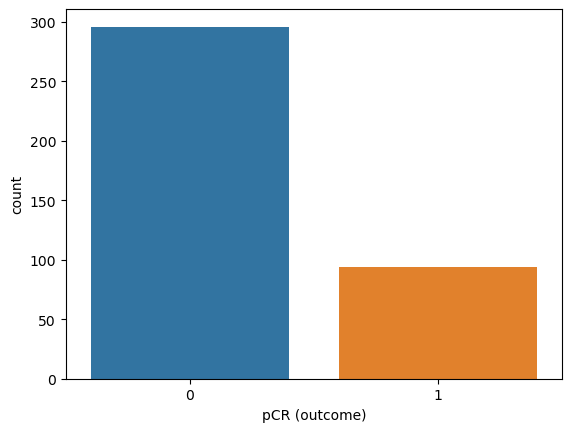

In [18]:
sns.countplot(x='pCR (outcome)', data=df)

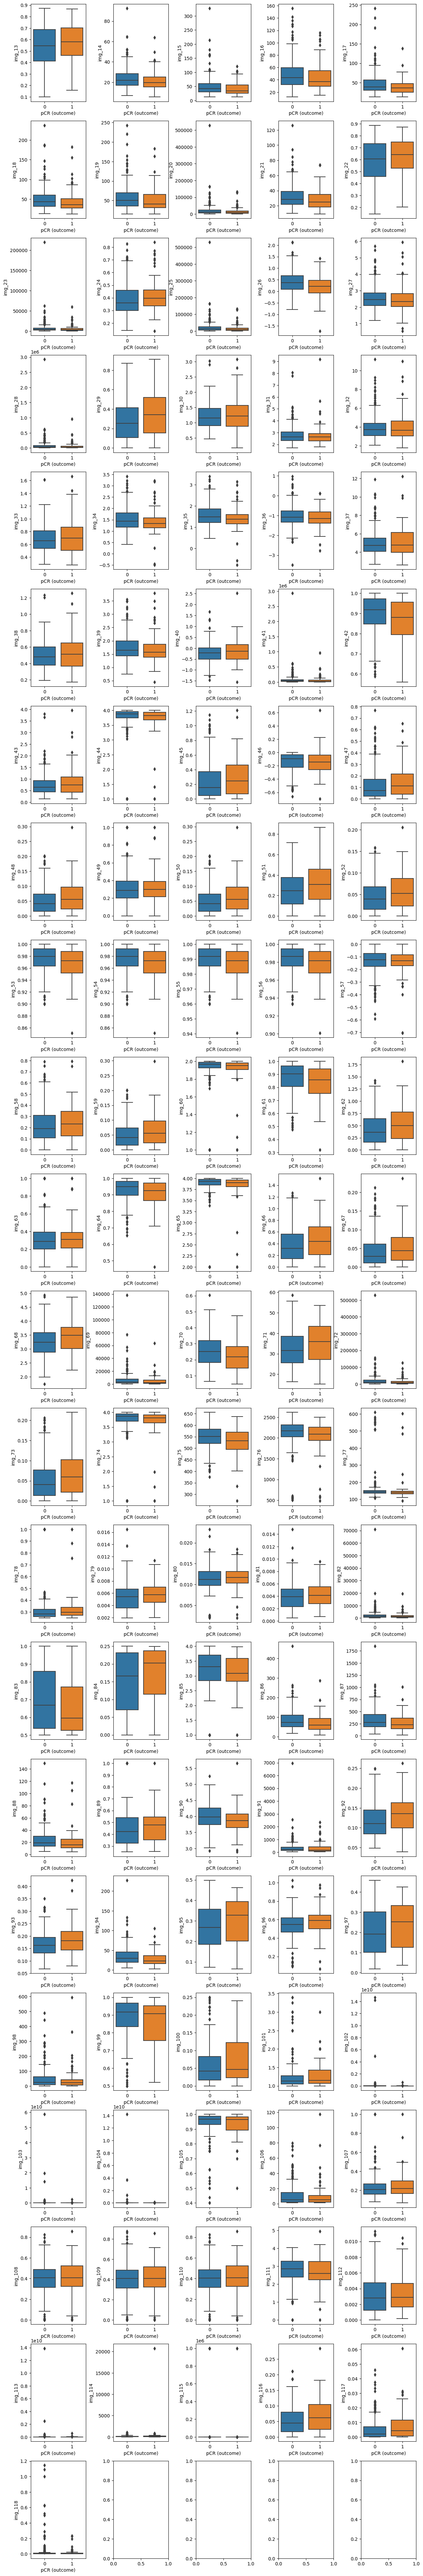

In [ ]:
fig, axes = plt.subplots(nrows=22, ncols=5, figsize=(15,100)) 
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(df.columns[14:]):
    _= sns.boxplot(y=col, x='pCR (outcome)', data=df, ax=axes[i])

In [ ]:
df.reset_index()
df.drop('index', axis=1, inplace=True)

In [ ]:
col = df.columns[0]
col

'pCR (outcome)'

In [ ]:
threshold = 4 # standard deviations from mean (99.7% of data)
for i, col_name in enumerate(df.columns):
    col = df[col_name]
    mean = np.mean(col)
    std = np.std(col)
    for j, x in enumerate(col):
        z = (x - mean) / std
        if z > threshold:
            df.iloc[j, i] = mean

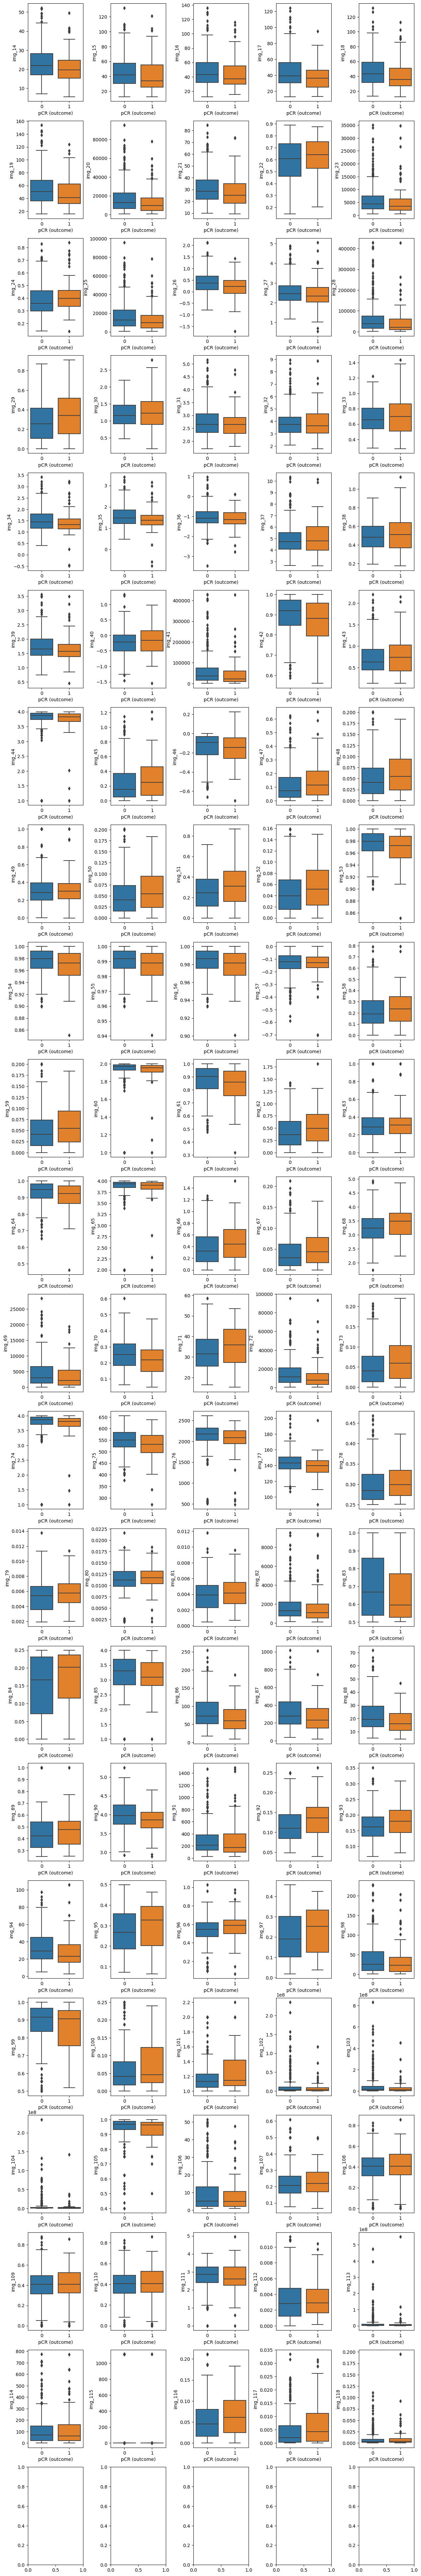

In [ ]:
fig, axes = plt.subplots(nrows=22, ncols=5, figsize=(15,100)) 
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(df.columns[14:]):
    _= sns.boxplot(y=col, x='pCR (outcome)', data=df, ax=axes[i])

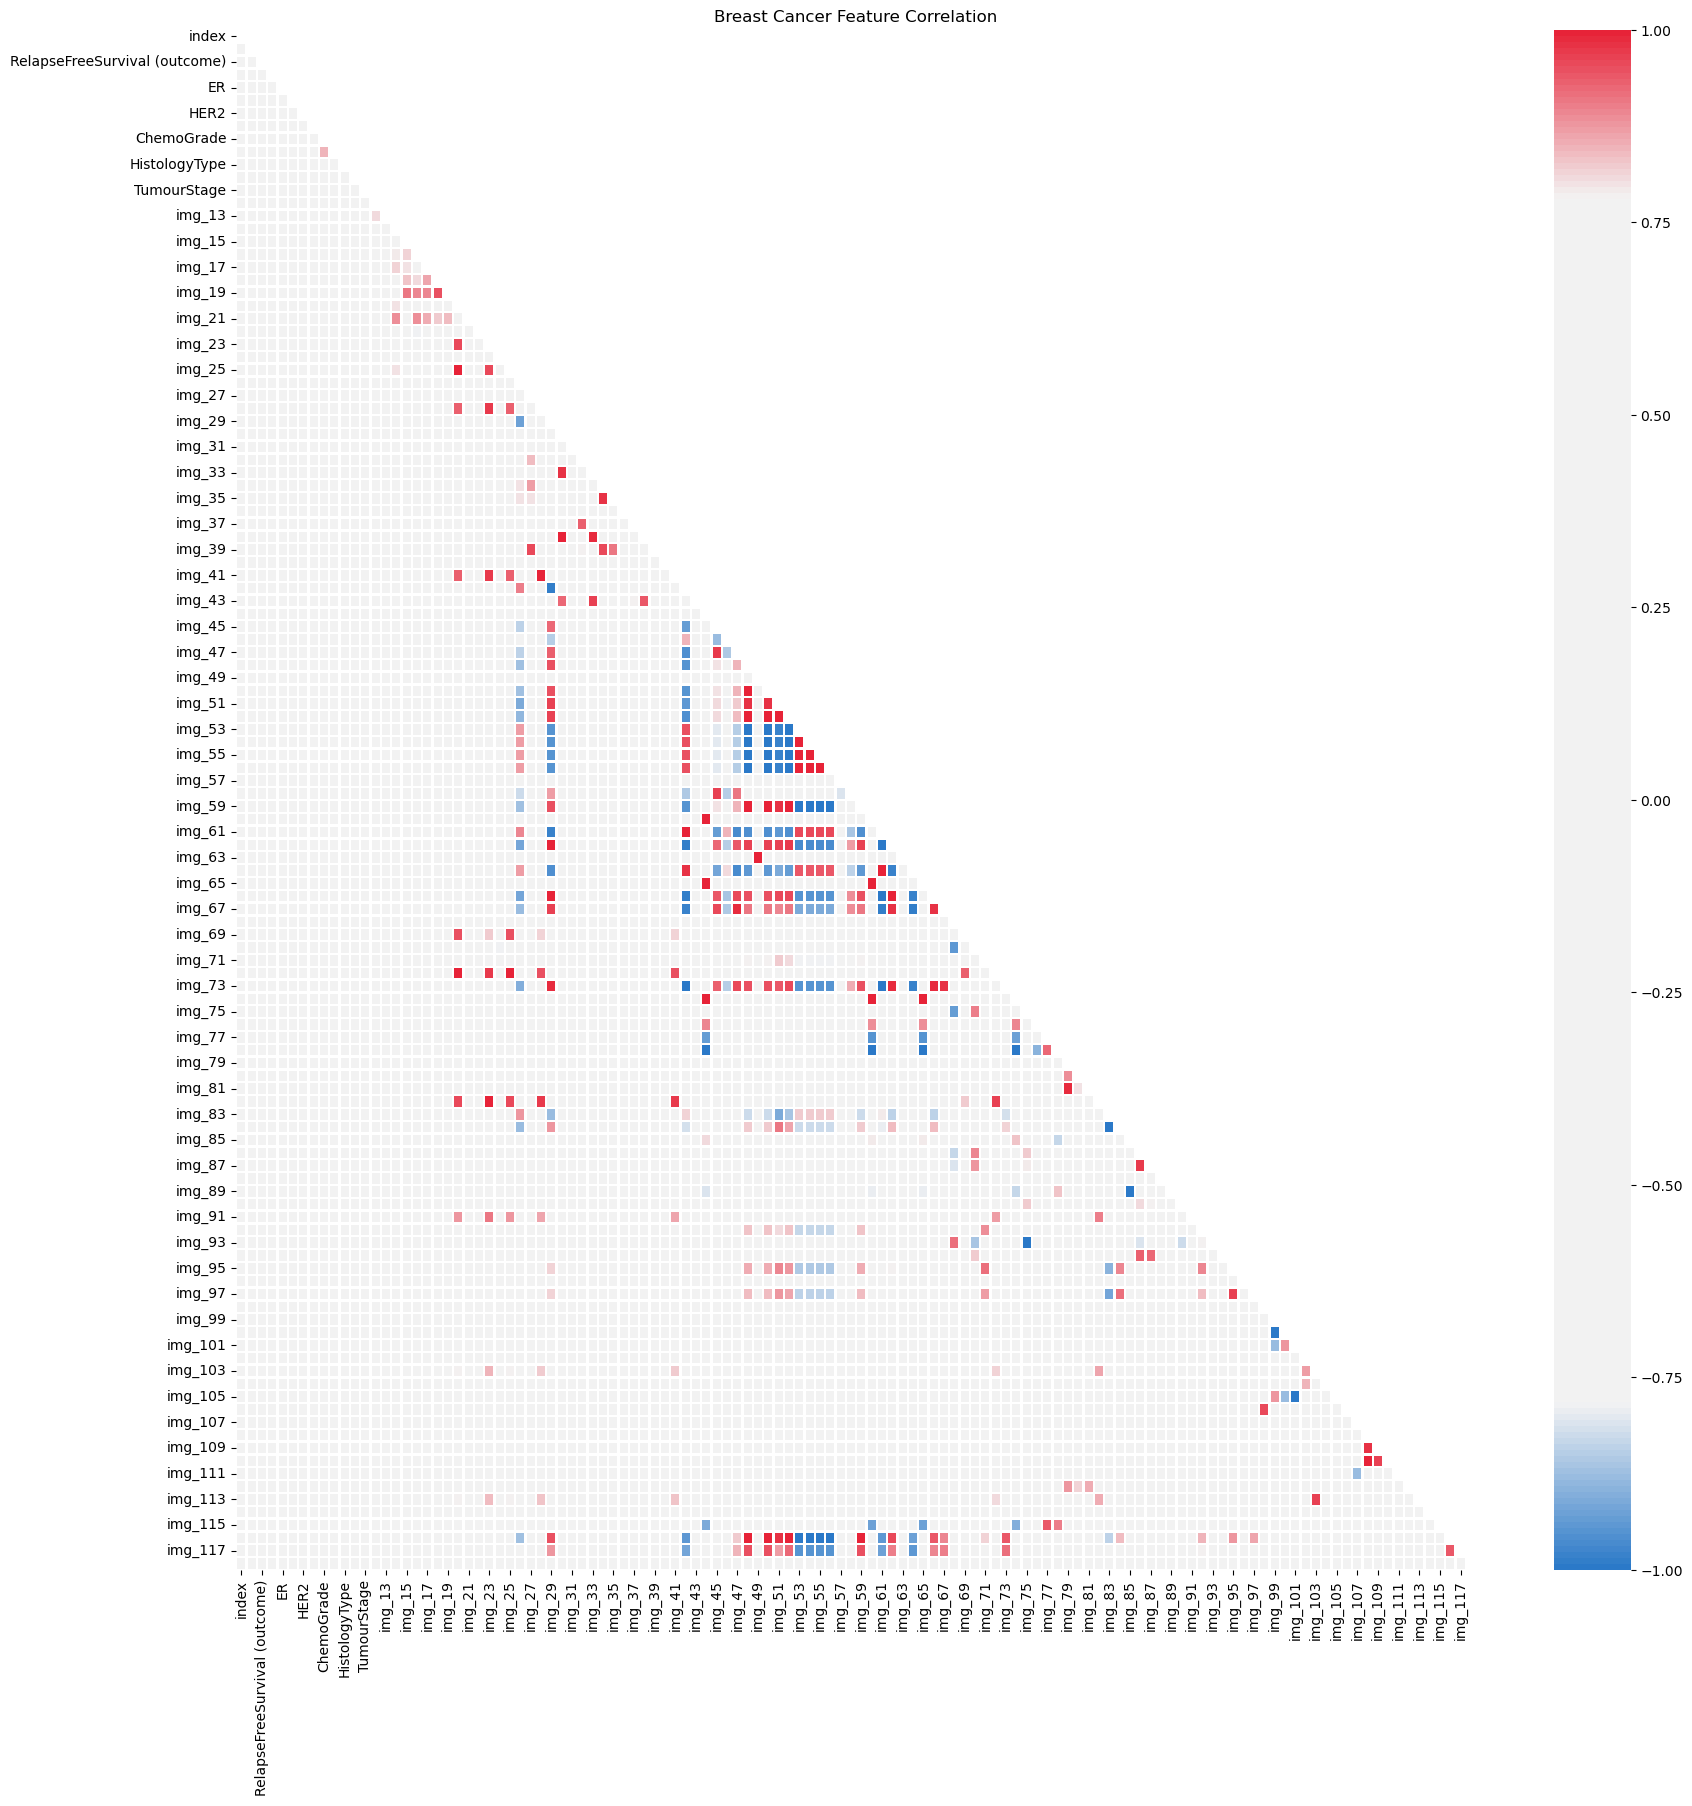

In [ ]:
sensitivity = 0 # int in range [0,100] specifies how sensitive the correlation color map is

corrMatt = df.iloc[14:].corr()
# Generate a mask for the upper triangle 
mask = np.zeros_like(corrMatt) 
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20)) 
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, 90, sep=201-2*sensitivity, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corrMatt, vmax=1, square=False, cmap=cmap, mask=mask, ax=ax, annot=False, fmt='.2g', linewidths=1);

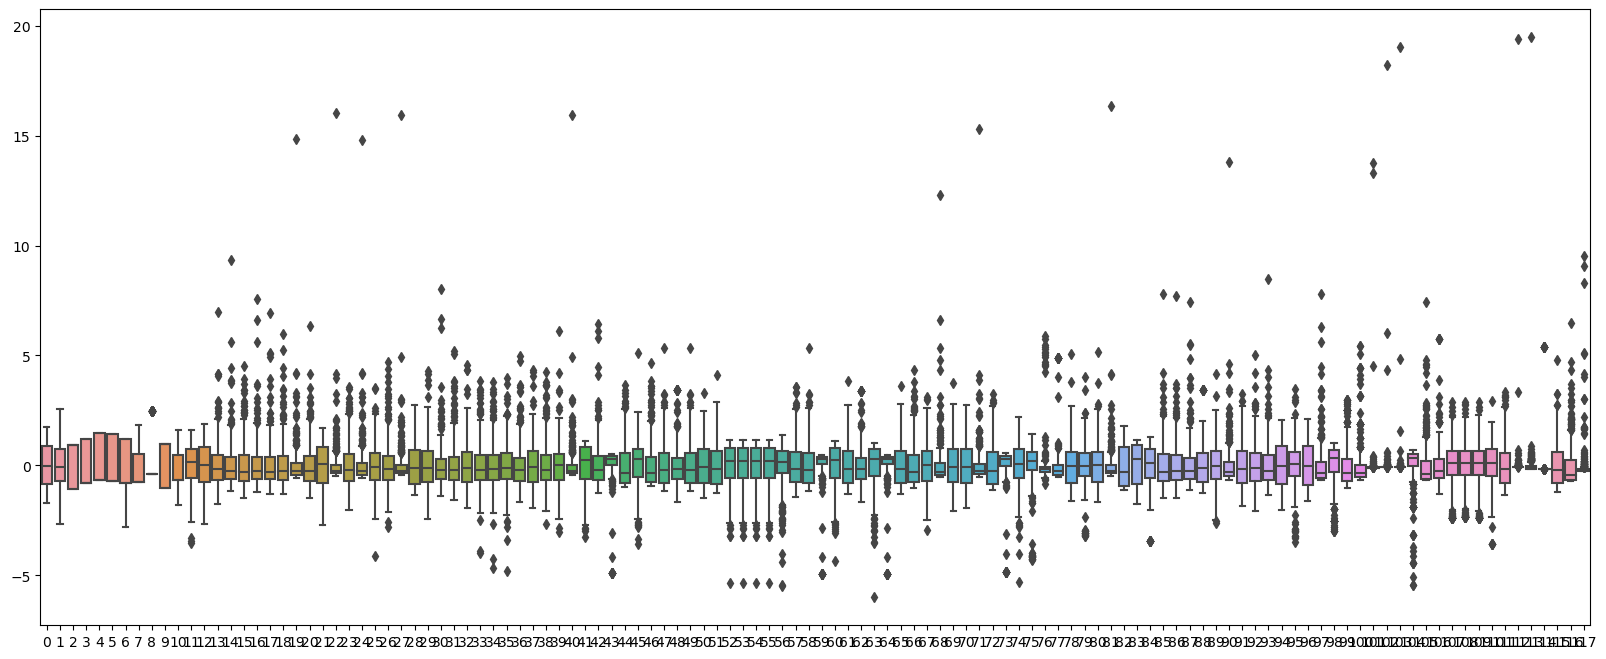

In [ ]:
# Assign features to X
X = df.drop('pCR (outcome)', axis=1).drop('RelapseFreeSurvival (outcome)', axis=1)
# Normalise the features to use zero mean normalisation
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
Xs = scaler.fit_transform(X) 
fig,ax=plt.subplots(1,figsize=(20,8)) 
sns.boxplot(data=Xs,ax=ax)

In [ ]:
pg = sns.pairplot(df[list(df.columns[14:25]) + ['pCR (outcome)']], hue="pCR (outcome)")